# Optimization Using Newton's Method

Implementing Newton's method optimizing some functions in one and two variables. Also compareing Newton's method with the gradient descent, experiencing advantages and disadvantages of each of the methods.

# Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

## 1 - Function in One Variable

In [3]:
def f_ex_1(x):
    return np.exp(x) - np.log(x)

def dfdx_ex_1(x):
    return np.exp(x) - 1/x

def d2fdx2_ex_1(x):
    return np.exp(x) + 1/(x**2)

x_0 = 1.6
print(f"f({x_0}) = {f_ex_1(x_0)}")
print(f"f'({x_0}) = {dfdx_ex_1(x_0)}")
print(f"f''({x_0}) = {d2fdx2_ex_1(x_0)}")

f(1.6) = 4.483028795149379
f'(1.6) = 4.328032424395115
f''(1.6) = 5.343657424395115


Plotting the function to visualize the global minimum

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$x$', ylabel='$f\\,(x)$'>)

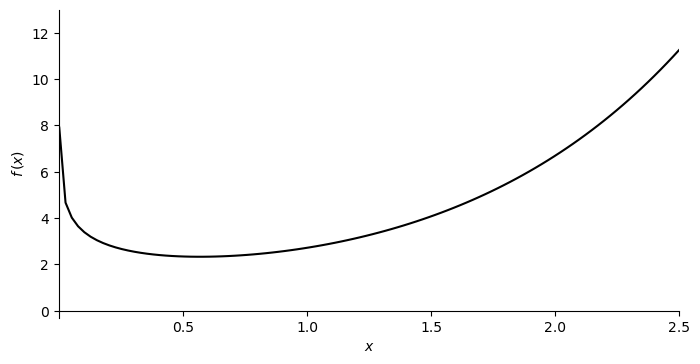

In [4]:
def plot_f(x_range, y_range, f, ox_position):
    x = np.linspace(*x_range, 100)
    fig, ax = plt.subplots(1,1,figsize=(8,4))

    ax.set_ylim(*y_range)
    ax.set_xlim(*x_range)
    ax.set_ylabel('$f\,(x)$')
    ax.set_xlabel('$x$')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data', ox_position))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.autoscale(enable=False)
    
    pf = ax.plot(x, f(x), 'k')
    
    return fig, ax

plot_f([0.001, 2.5], [-0.3, 13], f_ex_1, 0.0)

### Implementing Newton's method

In [5]:
def newtons_method(dfdx, d2fdx2, x, num_iterations = 100):
    for i in range(num_iterations):
        x = x - dfdx(x) / d2fdx2(x)
        print(x)
    
    return x

In [6]:
num_iterations_ex_1 = 25; x_initial = 1.6
newtons_example_1 = newtons_method(dfdx_ex_1, d2fdx2_ex_1, x_initial, num_iterations_ex_1)
print("Newton's method result: x_min =", newtons_example_1)

0.7900617721793732
0.5436324685389214
0.5665913613835818
0.567143002403454
0.5671432904097056
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
Newton's method result: x_min = 0.5671432904097838


We can see that starting from the initial point $x_0 = 1.6$ Newton's method converges after $6$ iterations. You could actually exit the loop when there is no significant change of $x$ each step (or when first derivative is close to zero).

Now implemnting Gradient descent meathod to compare it with newton's meathod

In [7]:
def gradient_descent(dfdx, x, learning_rate, num_iterations = 100):
    for i in range(num_iterations):
        x = x - learning_rate * dfdx(x)
        print(x)
    return x 

In [8]:
num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.2; x_initial = 1.6
gd_ex_1 = gradient_descent(dfdx_ex_1, x_initial, learning_rate, num_iterations)
print("Gradient descent result: x_min =", gd_ex_1)

1.1671967575604887
0.9315747895403638
0.7850695373565493
0.693190848956033
0.6374425307430822
0.6051557294974615
0.5872487093998153
0.5776311173426577
0.5725707323584608
0.5699397792550739
0.5685808560397663
0.5678813962508925
0.5675220281938029
0.567337566350933
0.5672429290172856
0.567194387884144
0.5671694934881042
0.5671567271988156
0.5671501806396171
0.5671468236191124
0.5671451021825211
0.5671442194561769
0.5671437668086716
0.5671435346987772
0.5671434156768685
Gradient descent result: x_min = 0.5671434156768685


Gradient descent method has an extra parameter `learning_rate`. If you take it equal to `0.1` in this example, the method will start to converge after about $15$ iterations (aiming for an accuracy of 4-5 decimal places). If you increase it to $0.2$, gradient descent will converge within about $12$ iterations, which is still slower than Newton's method. 

So, those are disadvantages of gradient descent method in comparison with Newton's method: there is an extra parameter to control and it converges slower. However it has an advantage - in each step you do not need to calculate second derivative, which in more complicated cases is quite computationally expensive to find. So, one step of gradient descent method is easier to make than one step of Newton's method.

In numerical optimization convergency and actual result depend on the initial parameters. Also, there is no "perfect" algorithm - every method will have advantages and disadvantages.

## 2 - Function in Two Variables

In [10]:
def f_ex_2(x, y):
    return x**4 + 0.8*y**4 + 4*x**2 + 2*y**2 - x*y -0.2*x**2*y

def grad_f_ex_2(x, y):
    return np.array([[4*x**3 + 8*x - y - 0.4*x*y],
                     [3.2*y**3 +4*y - x - 0.2*x**2]])

def hessian_f_ex_2(x, y):
    hessian_f = np.array([[12*x**2 + 8 - 0.4*y, -1 - 0.4*x],
                         [-1 - 0.4*x, 9.6*y**2 + 4]])
    return hessian_f

x_0, y_0 = 4, 4
print(f"f{x_0, y_0} = {f_ex_2(x_0, y_0)}")
print(f"grad f{x_0, y_0} = \n{grad_f_ex_2(x_0, y_0)}")
print(f"H{x_0, y_0} = \n{hessian_f_ex_2(x_0, y_0)}")

f(4, 4) = 528.0
grad f(4, 4) = 
[[277.6]
 [213.6]]
H(4, 4) = 
[[198.4  -2.6]
 [ -2.6 157.6]]


(<Figure size 1000x500 with 2 Axes>,
 <Axes: xlabel='$x$', ylabel='$y$'>,
 <Axes3D: xlabel='$x$', ylabel='$y$', zlabel='$f$'>)

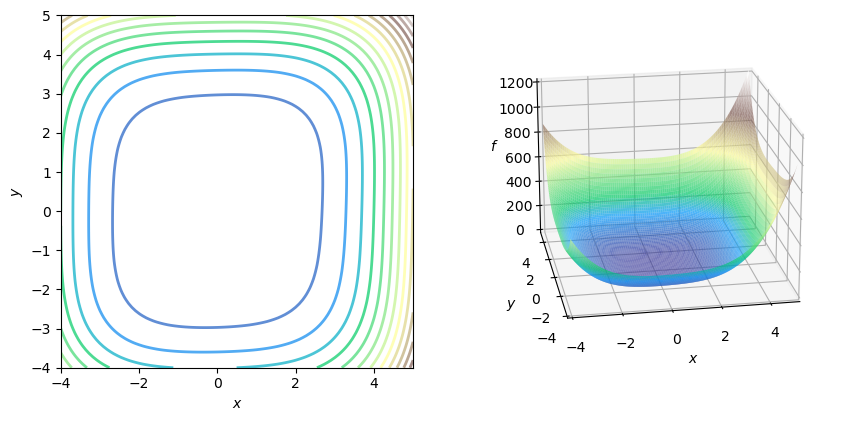

In [12]:
def plot_f_cont_and_surf(f):
    
    fig = plt.figure( figsize=(10,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.set_facecolor('#ffffff')
    gs = GridSpec(1, 2, figure=fig)
    axc = fig.add_subplot(gs[0, 0])
    axs = fig.add_subplot(gs[0, 1],  projection='3d')
    
    x_range = [-4, 5]
    y_range = [-4, 5]
    z_range = [0, 1200]
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X,Y = np.meshgrid(x,y)
    
    cont = axc.contour(X, Y, f(X, Y), cmap='terrain', levels=18, linewidths=2, alpha=0.7)
    axc.set_xlabel('$x$')
    axc.set_ylabel('$y$')
    axc.set_xlim(*x_range)
    axc.set_ylim(*y_range)
    axc.set_aspect("equal")
    axc.autoscale(enable=False)
    
    surf = axs.plot_surface(X,Y, f(X,Y), cmap='terrain', 
                    antialiased=True,cstride=1,rstride=1, alpha=0.69)
    axs.set_xlabel('$x$')
    axs.set_ylabel('$y$')
    axs.set_zlabel('$f$')
    axs.set_xlim(*x_range)
    axs.set_ylim(*y_range)
    axs.set_zlim(*z_range)
    axs.view_init(elev=20, azim=-100)
    axs.autoscale(enable=False)
    
    return fig, axc, axs

plot_f_cont_and_surf(f_ex_2)